        # Turkish Patients' Records for determining Disease, Sarcopenia through MACHINE LEARNING --- PROJECT.

# 1)PIPELINE:   Sourcing and loading

In [1]:
import pandas as pd
import numpy as np
SARC = pd.read_csv('DataSensitive.csv')
print(SARC.isnull().sum())
print("total number of Rows and Columns in the dataframe: " , SARC.shape)
# first divide by age and adults with (RAS)-related disorder; then Grip strength, then STAR, 
# thigh, age, activity/exercise, anterior thigh miuscle, asm/height^2, association of comorbid diseases,   metabolic disorders, 
# insulin resistance and lipodystrophy , grip strgth and musscle mass,gait speed

# chronic comorbid diseases such as hypertension (HT), diabetes mellitus (DM), coronary artery disease (CAD), 

MMSE                       491
Age                          0
Weight                       1
Height                       2
Waist                        6
Hip                          7
Smoking                      1
 Smoking (packet/year)       2
  Alcohol                    0
DM                           0
DM duration                 14
İnsülin                      6
 DM drug                   924
Hiperlipidemi                2
Dyslipidemia duration       16
Dyslipidemia drugs        1072
KAH                         42
KAH duration                54
Hipotiroidi                 32
ASTIM                      123
KOAH                        78
OP                         948
Other(s)                  1018
HT                           0
Anti-HT drug type          553
HT duration                 42
Education                   20
Occupation                  64
Working Status              80
Exercise                    20
LowCST                     190
CST                          0
Gait spe

In [2]:
# Finding unique values to determine and clean the data
unique_values = pd.Series({col: SARC[col].unique() for col in SARC})
unique_values

MMSE                      [nan, 24.0, 30.0, 27.0, 28.0, 29.0, 23.0, 26.0...
Age                       [64, 53, 56, 58, 55, 57, 60, 75, 76, 68, 71, 6...
Weight                    [66.0, 55.0, 56.0, 75.0, 72.0, 98.0, 65.0, 74....
Height                    [155.0, 150.0, 160.0, 157.0, 179.0, 164.0, 170...
Waist                     [89.0, 77.0, 112.0, 113.0, 98.0, 110.0, 90.0, ...
Hip                       [104.0, 97.0, 125.0, nan, 100.0, 86.0, 115.0, ...
Smoking                                                     [0.0, 1.0, nan]
 Smoking (packet/year)    [0, 4, 30, 11.5, 15, 25, 35, 100, 70, 5, 45, 1...
  Alcohol                 [0, social, Social , Regular, regular, Social,...
DM                                                                   [0, 1]
DM duration               [0.0, 2.0, 20.0, 16.0, 6.0, 1.0, 15.0, 10.0, 3...
İnsülin                                                     [0.0, 1.0, nan]
 DM drug                  [nan, Glicazide, Metformin, metformin+sitaglip...
Hiperlipidem

In [3]:
# DELETING NULL VALUES FROM THE column, SARCOPENIA, as itsall the rows are nulled:
SARC.dropna(subset=['SARCOPENIA'], inplace=True)
# remove whitespaces and capitalize values in the name column
SARC['Gender'] = SARC['Gender'].str.strip().str.upper()
SARC['  Alcohol']= SARC['  Alcohol'].str.strip().str.upper()
# rename the name column to full_name
SARC.rename(columns={'  Alcohol': 'Alcohol'}, inplace=True)
SARC.rename(columns={' Smoking (packet/year)':'Smoking (packet/year)'},inplace=True)
SARC.rename(columns={' DM drug':'DM drug'},inplace=True)

In [4]:
SARC['Education']= SARC['Education'].str.strip().str.title()
# Defined the values to replace
replace_dict = {'ilkokul': 'Primary School', 'Ilkokul':'Primary School',
'illeterate': 'Uneducated','Illeterate': 'Uneducated',
'İlliterate':'Uneducated',
'lise': 'High School',
'okur-yazar değil': 'Uneducated','None':'Not Indicated','Housewife':'Not Indicated',
'ortaokul': 'Secondary school', 'Ortaokul':'Secondary school', 'Worker': 'Not Indicated',
'ılliterate': 'Uneducated',
'Lise': 'High School','Illiterate': 'Uneducated', 'Highschool': 'High School', 'Üniversite': 'University', 'Okur-Yzar Değil': 'Uneducated' }


# Replaced the values in the DataFrame
SARC['Education'].replace(replace_dict, regex=True, inplace=True)
SARC['Education']= SARC['Education'].str.title()

In [5]:
SARC['Working Status']= SARC['Working Status'].str.strip().str.title()
# Defined the values to replace
replace_dict = {'çalışmıyor': 'Unemployed','Çalışmıyor': 'Unemployed','Emekli Veya Çalışmıyor': 'Retired','Evhanımı': 'Unemployed','Emekli': 'Retired',
'Tam/Kısmi Zamanlı Çalışıyor': 'Employed','Çalışıyor': 'Employed','Çalişiyor': 'Employed','Calısıyor': 'Employed','Tam/Kısmi Zamnalı Çalışıyor': 'Employed',
'Retire': 'Retired', 'Full-Time/Part-Time Work' : 'Employed','Not Working': 'Unemployed', 'Retired Or Not Working': 'Employed', 'Working':'Employed','Retired Veya Unemployed': 'Retired', 'Full Time/Part-Time Work': 'Employed','Full-Time' : 'Employed','Full/Part Time': 'Employed',
'Full/Part Time Work': 'Employed','Full Time': 'Employed', 'Retd': 'Retired', 'Part-Time': 'Employed','Full Time Work': 'Employed', 
'Part Time Work': 'Employed', 'Fulltime': 'Employed','Tam/Kısmi Zamnalı Employed': 'Employed', 'Ull-Time/Part-Time Work': 'Employed','Actively Working': 'Employed',
'Retiredd': 'Retired', 'Retiredd Or Unemployed': 'Retired', 'Retired Veya Unemployed': 'Retired', 'Employed Work': 'Employed', 'Tam/Kısmi Zamnalı Employed': 'Employed', 'Ull-Time/Employed Work': 'Employed','Actively Employed': 'Employed','Retired Or Unemployed': 'Retired', 'Ull-Time/Employed': 'Employed', 'Retired Or Unemployed': 'Retired'}


# Replaced the values in the DataFrame
SARC['Working Status'].replace(replace_dict, regex=True, inplace=True)

replace_dict1 = {'Retiredd': 'Retired', 'Retiredd Or Unemployed': 'Retired', 'Retired Veya Unemployed': 'Retired', 'Employed Work': 'Employed', 'Tam/Kısmi Zamnalı Employed': 'Employed', 'Ull-Time/Employed Work': 'Employed','Actively Employed': 'Employed','Retired Or Unemployed': 'Retired', 'Ull-Time/Employed': 'Employed', 'Retired Or Unemployed': 'Retired'}

# Replaced the values in the DataFrame
#SARC.replace(replace_dict, regex=True, inplace=True)

SARC['Working Status'].replace(replace_dict1, regex=True, inplace=True)

replace_dict2 = {'Retired Or Unemployed': 'Retired','Abstinence':'Unemployed','#Ref!': 'Employed'}

# Replaced the values in the DataFrame
#SARC.replace(replace_dict, regex=True, inplace=True)

SARC['Working Status'].replace(replace_dict2, regex=True, inplace=True)

# DIVISION OF SEXES TO DETERMINE THE DISEASE USING LOGISTIIC REGRESION

In [6]:
# Based on Assumption on the word, NaN, in the column 'Smoking', NaN is replaced by '0' as there is only one one NaN:
SARC[['Smoking']] = SARC[['Smoking']].replace(np.nan,0)
SARC.loc[SARC['Smoking (packet/year)'].isnull()]
# USING GROUPBY
SARC_F = SARC[SARC['Gender']=='F']
SARC_M = SARC[SARC['Gender']=='M']
# MODEL 1 : CONCENTRATING ON NON-CLINICAL COLUMNS, such as age, weight, height, exercise, Hiper tension, DM, Education, Smoking..
SARC_F[['Education']] = SARC_F[['Education']].replace(np.nan,"Not Indicated")
SARC_M[['Education']] = SARC_M[['Education']].replace(np.nan,"Not Indicated")

C:\Users\zohairk\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [7]:

for col in SARC_F.columns:
    if col in ['MMSE', 'Age', 'Weight ', 'Height ', 'Waist ', 'Hip', 'Smoking',
       'Smoking (packet/year)', 'Alcohol', 'DM ', 'DM duration', 'İnsülin',
       'DM drug', 'Hiperlipidemi', 'Dyslipidemia duration',
       'Dyslipidemia drugs ', 'KAH', 'KAH duration', 'Hipotiroidi', 'ASTIM',
       'KOAH', 'OP', 'Other(s)', 'HT', 'Anti-HT drug type', 'HT duration',
       'Education', 'Occupation', 'Working Status', 'Exercise', 'LowCST',
       'CST', 'Gait speed', 'Low grip strength', 'Grip strength',
       'STAR', 'BMI', 'Gender']:
        SARC_F[col] = SARC_F[col].interpolate()

for col in SARC_M.columns:
    if col in ['MMSE', 'Age', 'Weight ', 'Height ', 'Waist ', 'Hip', 'Smoking',
       'Smoking (packet/year)', 'Alcohol', 'DM ', 'DM duration', 'İnsülin',
       'DM drug', 'Hiperlipidemi', 'Dyslipidemia duration',
       'Dyslipidemia drugs ', 'KAH', 'KAH duration', 'Hipotiroidi', 'ASTIM',
       'KOAH', 'OP', 'Other(s)', 'HT', 'Anti-HT drug type', 'HT duration',
       'Education', 'Occupation', 'Working Status', 'Exercise', 'LowCST',
       'CST', 'Gait speed', 'Low grip strength', 'Grip strength',
       'STAR', 'BMI', 'Gender']:
        SARC_M[col] = SARC_M[col].interpolate()

<ipython-input-7-f7abc4d1f789>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SARC_F[col] = SARC_F[col].interpolate()
<ipython-input-7-f7abc4d1f789>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SARC_M[col] = SARC_M[col].interpolate()


# MODEL 1: LOGISTIC REGRESSION after Gender seperation and using the variables, such are: ['Age', 'Weight ', 'Height ', 'Smoking', 'DM ', 'HT', 'Education','Exercise']

In [8]:
X=SARC_F.drop(columns=['Waist ','MMSE', 'Hip','Smoking (packet/year)', 'Alcohol', 'DM duration', 'İnsülin','DM drug', 'Hiperlipidemi', 'Dyslipidemia duration','Dyslipidemia drugs ', 'KAH', 'KAH duration', 'Hipotiroidi', 'ASTIM','KOAH', 'OP', 'Other(s)',  'Anti-HT drug type', 'HT duration','Occupation', 'Working Status', 'LowCST','CST', 'Gait speed', 'Low grip strength', 'Grip strength', 'SARCOPENIA','STAR', 'BMI','Gender'])
y=SARC_F.SARCOPENIA
cat_cols = X.dtypes[X.dtypes=='object'].index
num_cols = X.dtypes[X.dtypes!='object'].index
#X = X.apply(pd.to_numeric, errors='coerce')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.metrics import accuracy_score
# Train the model on the transformed data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ct = ColumnTransformer(
    [
        ('scaling', StandardScaler(), num_cols),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ]
)

#column_names = (num_cols+ ct.named_transformers_["onehotencoder"].get_feature_names_out().tolist())

#X = pd.DataFrame(transformed, columns=column_names)
# the classifier
classifier = LogisticRegression()
# Created a pipeline that combines the preprocessor and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', ct),
    ('classifier', classifier)
])

# Fit the pipeline on the train set
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the accuracy
#accuracy = accuracy_score(y_test, y_pred){accuracy:.2f}
print(f'Accuracy for female SARCOPENIA chances: ')
Reg_F_1=pipeline.score(X_test, y_test)
print(f'Regression Score: {Reg_F_1:.5f}', "from using the Female variables:", X.columns)
print(":-:-:-"*20)
print("-:-:-:"*20)
import warnings

X=SARC_M.drop(columns=['Waist ','MMSE', 'Hip','Smoking (packet/year)', 'Alcohol', 'DM duration', 'İnsülin','DM drug', 'Hiperlipidemi', 'Dyslipidemia duration','Dyslipidemia drugs ', 'KAH', 'KAH duration', 'Hipotiroidi', 'ASTIM','KOAH', 'OP', 'Other(s)',  'Anti-HT drug type', 'HT duration','Occupation', 'Working Status', 'LowCST','CST', 'Gait speed', 'Low grip strength', 'Grip strength', 'SARCOPENIA','STAR', 'BMI','Gender'])
y=SARC_M.SARCOPENIA
cat_cols = X.dtypes[X.dtypes=='object'].index
num_cols = X.dtypes[X.dtypes!='object'].index
#X = X.apply(pd.to_numeric, errors='coerce')

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

# Train the model on the transformed data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ct = ColumnTransformer(
    [
        ('scaling', StandardScaler(), num_cols),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ]
)

#column_names = (num_cols+ ct.named_transformers_["onehotencoder"].get_feature_names_out().tolist())

#X = pd.DataFrame(transformed, columns=column_names)
# the classifier
classifier = LogisticRegression()
 
# Created a pipeline that combines the preprocessor and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', ct),
    ('classifier', classifier)
])

# Fit the pipeline on the train set
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the accuracy
#accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for Male SARCOPENIA chances:')
Reg_M_1=pipeline.score(X_test, y_test)

print(f'Regression Score: {Reg_M_1:.5f}', "from using the male variables:", X.columns)
print("CONCLUSION: There seems to be more chances of the disease, Sarcopenia, happening in Female as compared \n to their counterparts by keeping the variables,", X.columns)

Accuracy for female SARCOPENIA chances: 
Regression Score: 0.82251 from using the Female variables: Index(['Age', 'Weight ', 'Height ', 'Smoking', 'DM ', 'HT', 'Education',
       'Exercise'],
      dtype='object')
:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-
-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:
Accuracy for Male SARCOPENIA chances:
Regression Score: 0.81053 from using the male variables: Index(['Age', 'Weight ', 'Height ', 'Smoking', 'DM ', 'HT', 'Education',
       'Exercise'],
      dtype='object')
CONCLUSION: There seems to be more chances of the disease, Sarcopenia, happening in Female as compared 
 to their counterparts by keeping the variables, Index(['Age', 'Weight ', 'Height ', 'Smoking', 'DM ', 'HT', 'Education',
       'Exercise'],
      dtype='object')


# MODEL 2: 

In [9]:
X=SARC_F.drop(columns=['Waist ','MMSE', 'Hip','Smoking (packet/year)', 'Alcohol', 'DM duration', 'İnsülin','DM drug', 'Hiperlipidemi', 'Dyslipidemia duration','Dyslipidemia drugs ', 'KAH', 'KAH duration', 'Hipotiroidi', 'ASTIM','KOAH', 'OP', 'Other(s)',  'Anti-HT drug type', 'HT duration','Occupation', 'Working Status', 'LowCST', 'Low grip strength', 'Grip strength', 'SARCOPENIA','STAR', 'BMI','Gender'])
y=SARC_F.SARCOPENIA
cat_cols = X.dtypes[X.dtypes=='object'].index
num_cols = X.dtypes[X.dtypes!='object'].index
#X = X.apply(pd.to_numeric, errors='coerce')

# Train the model on the transformed data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ct = ColumnTransformer(
    [
        ('scaling', StandardScaler(), num_cols),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ]
)

#column_names = (num_cols+ ct.named_transformers_["onehotencoder"].get_feature_names_out().tolist())

#X = pd.DataFrame(transformed, columns=column_names)
# the classifier
classifier = LogisticRegression()
# Created a pipeline that combines the preprocessor and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', ct),
    ('classifier', classifier)
])

# Fit the pipeline on the train set
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for female SARCOPENIA chances: {accuracy:.2f}')
Reg_F_2=pipeline.score(X_test, y_test)

print(f'Regression Score: {Reg_F_2:.5f}', "from using the Female variables:", X.columns)

print(":-:-:-"*20)
print("-:-:-:"*20)
import warnings

X=SARC_M.drop(columns=['Waist ','MMSE', 'Hip','Smoking (packet/year)', 'Alcohol', 'DM duration', 'İnsülin','DM drug', 'Hiperlipidemi', 'Dyslipidemia duration','Dyslipidemia drugs ', 'KAH', 'KAH duration', 'Hipotiroidi', 'ASTIM','KOAH', 'OP', 'Other(s)',  'Anti-HT drug type', 'HT duration','Occupation', 'Working Status', 'LowCST', 'Low grip strength', 'Grip strength', 'SARCOPENIA','STAR', 'BMI','Gender'])
y=SARC_M.SARCOPENIA
cat_cols = X.dtypes[X.dtypes=='object'].index
num_cols = X.dtypes[X.dtypes!='object'].index
#X = X.apply(pd.to_numeric, errors='coerce')


warnings.filterwarnings('ignore')

# Train the model on the transformed data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ct = ColumnTransformer(
    [
        ('scaling', StandardScaler(), num_cols),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ]
)

#column_names = (num_cols+ ct.named_transformers_["onehotencoder"].get_feature_names_out().tolist())

#X = pd.DataFrame(transformed, columns=column_names)
# the classifier
classifier = LogisticRegression()
 
# Created a pipeline that combines the preprocessor and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', ct),
    ('classifier', classifier)
])

# Fit the pipeline on the train set
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)
Reg_M_2=pipeline.score(X_test, y_test)
# Evaluate the accuracy
#accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for Male SARCOPENIA chances:')
print(f'Regression Score: {Reg_M_2:.5f}', "from using the Male variables:", X.columns)

print("CONCLUSION: There seems to be more chances of the disease, Sarcopenia, happening in Female as compared \n to their counterparts by keeping the variables,", X.columns)

Accuracy for female SARCOPENIA chances: 0.81
Regression Score: 0.80952 from using the Female variables: Index(['Age', 'Weight ', 'Height ', 'Smoking', 'DM ', 'HT', 'Education',
       'Exercise', 'CST', 'Gait speed'],
      dtype='object')
:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-
-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:
Accuracy for Male SARCOPENIA chances:
Regression Score: 0.82105 from using the Male variables: Index(['Age', 'Weight ', 'Height ', 'Smoking', 'DM ', 'HT', 'Education',
       'Exercise', 'CST', 'Gait speed'],
      dtype='object')
CONCLUSION: There seems to be more chances of the disease, Sarcopenia, happening in Female as compared 
 to their counterparts by keeping the variables, Index(['Age', 'Weight ', 'Height ', 'Smoking', 'DM ', 'HT', 'Education',
       'Exercise', 'CST', 'Gait speed'],
      dtype='object'

# MODEL 3 

In [10]:
X3f=SARC_F.drop(columns=['Waist ','MMSE', 'Hip','Smoking (packet/year)', 'Alcohol', 'DM duration', 'İnsülin','DM drug', 'Hiperlipidemi', 'Dyslipidemia duration','Dyslipidemia drugs ', 'KAH', 'KAH duration', 'Hipotiroidi', 'ASTIM','KOAH', 'OP', 'Other(s)',  'Anti-HT drug type', 'HT duration','Occupation', 'Working Status', 'LowCST', 'Low grip strength', 'SARCOPENIA','STAR', 'BMI','Gender'])
y3f=SARC_F.SARCOPENIA
cat_cols = X.dtypes[X.dtypes=='object'].index
num_cols = X.dtypes[X.dtypes!='object'].index
#X = X.apply(pd.to_numeric, errors='coerce')


# Train the model on the transformed data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ct = ColumnTransformer(
    [
        ('scaling', StandardScaler(), num_cols),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ]
)

#column_names = (num_cols+ ct.named_transformers_["onehotencoder"].get_feature_names_out().tolist())

#X = pd.DataFrame(transformed, columns=column_names)
# the classifier
classifier = LogisticRegression()
# Created a pipeline that combines the preprocessor and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', ct),
    ('classifier', classifier)
])

# Fit the pipeline on the train set
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)
Reg_F_3= pipeline.score(X_test, y_test)
# Evaluate the accuracy
#accuracy = accuracy_score(y_test, y_pred){accuracy:.2f}
#print(f'Accuracy for female SARCOPENIA chances: ')
print(f'Regression Score: {Reg_F_3:.5f}', "from using the Female variables:", X.columns)

print(":-:-:-"*20)
print("-:-:-:"*20)
import warnings

X=SARC_M.drop(columns=['Waist ','MMSE', 'Hip','Smoking (packet/year)', 'Alcohol', 'DM duration', 'İnsülin','DM drug', 'Hiperlipidemi', 'Dyslipidemia duration','Dyslipidemia drugs ', 'KAH', 'KAH duration', 'Hipotiroidi', 'ASTIM','KOAH', 'OP', 'Other(s)',  'Anti-HT drug type', 'HT duration','Occupation', 'Working Status', 'LowCST', 'Low grip strength', 'SARCOPENIA','STAR', 'BMI','Gender'])
y=SARC_M.SARCOPENIA
cat_cols = X.dtypes[X.dtypes=='object'].index
num_cols = X.dtypes[X.dtypes!='object'].index
#X = X.apply(pd.to_numeric, errors='coerce')

warnings.filterwarnings('ignore')

# Train the model on the transformed data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ct = ColumnTransformer(
    [
        ('scaling', StandardScaler(), num_cols),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ]
)

#column_names = (num_cols+ ct.named_transformers_["onehotencoder"].get_feature_names_out().tolist())

#X = pd.DataFrame(transformed, columns=column_names)
# the classifier
classifier = LogisticRegression()
 
# Created a pipeline that combines the preprocessor and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', ct),
    ('classifier', classifier)
])

# Fit the pipeline on the train set
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)
Reg_M_3= pipeline.score(X_test, y_test)

# Evaluate the accuracy
#accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for Male SARCOPENIA chances:')
print(f'Regression Score: {Reg_M_3:.5f}', "from using the Male variables:", X.columns)
print("CONCLUSION: There still seems to be more chances of the disease, Sarcopenia, happening in Female as compared \n to their counterparts, Males, by keeping the variables,", X.columns)

Regression Score: 0.82105 from using the Female variables: Index(['Age', 'Weight ', 'Height ', 'Smoking', 'DM ', 'HT', 'Education',
       'Exercise', 'CST', 'Gait speed'],
      dtype='object')
:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-
-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:
Accuracy for Male SARCOPENIA chances:
Regression Score: 0.83158 from using the Male variables: Index(['Age', 'Weight ', 'Height ', 'Smoking', 'DM ', 'HT', 'Education',
       'Exercise', 'CST', 'Gait speed', 'Grip strength'],
      dtype='object')
CONCLUSION: There still seems to be more chances of the disease, Sarcopenia, happening in Female as compared 
 to their counterparts, Males, by keeping the variables, Index(['Age', 'Weight ', 'Height ', 'Smoking', 'DM ', 'HT', 'Education',
       'Exercise', 'CST', 'Gait speed', 'Grip strength'],
      dtype='obje

(array([284.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  94.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

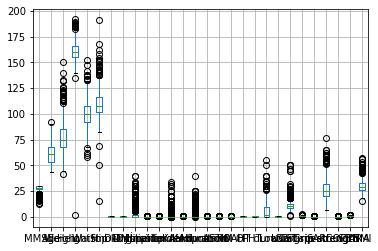

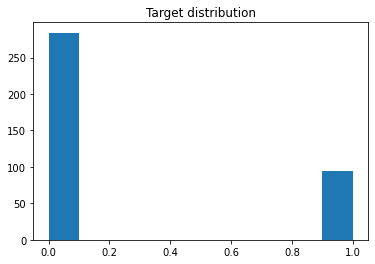

In [11]:
import matplotlib.pyplot as plt

SARC.boxplot()

plt.figure()
plt.title("Target distribution")
plt.hist(y, bins="auto")

In [12]:

noname = ['Model l: LogisticRegression', 'Model 2: LogisticRegression', 'Model 3: LogisticRegression']
Female_Reg_Scores = [Reg_F_1,Reg_F_2,Reg_F_3]
Male_Reg_Scores = [Reg_M_1, Reg_M_2,Reg_M_3]
Variables = ['Age, Weight, Height, Smoking,DM,HT,Educ,Exercise', 'CST & Gait Speed + Above', 'Grip Strength + Above']
  
# dictionary of lists 
dict = {'': noname, 'Female Reg Scores': Female_Reg_Scores , 'Male Reg Scores': Male_Reg_Scores, 'Variables':Variables } 
    
df = pd.DataFrame(dict)
df

,,Female Reg Scores,Male Reg Scores,Variables
0,Model l: LogisticRegression,0.822511,0.810526,"Age, Weight, Height, Smoking,DM,HT,Educ,Exercise"
1,Model 2: LogisticRegression,0.809524,0.821053,CST & Gait Speed + Above
2,Model 3: LogisticRegression,0.821053,0.831579,Grip Strength + Above


In [13]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Define a list of classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

X=SARC_F.drop(columns=['Waist ','MMSE', 'Hip','Smoking (packet/year)', 'Alcohol', 'DM duration', 'İnsülin','DM drug', 'Hiperlipidemi', 'Dyslipidemia duration','Dyslipidemia drugs ', 'KAH', 'KAH duration', 'Hipotiroidi', 'ASTIM','KOAH', 'OP', 'Other(s)',  'Anti-HT drug type', 'HT duration','Occupation', 'Working Status', 'LowCST', 'Low grip strength', 'SARCOPENIA','STAR', 'BMI','Gender'])
y=SARC_F.SARCOPENIA
cat_cols = X.dtypes[X.dtypes=='object'].index
num_cols = X.dtypes[X.dtypes!='object'].index
#X = X.apply(pd.to_numeric, errors='coerce')

warnings.filterwarnings('ignore')

# Train the model on the transformed data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ct = ColumnTransformer(
    [
        ('scaling', StandardScaler(), num_cols),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ]
)



    
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("SVM", SVC()),
    ("Random Forest", RandomForestClassifier()),
    ("Neural Network", MLPClassifier())
]



# Iterate over the estimators and fit them on the train set
for name, model in models:
    # Define the pipeline
    pipe = Pipeline(steps=[
        ('preprocessor', ct),
        ('estimator', model)
    ])
    # Fit the pipeline
    pipe.fit(X_train, y_train)
    print(f"{name} model fitted.")

# Iterate over the estimators and evaluate them on the test set
for name, model in models:
    # Define the pipeline
    pipe = Pipeline(steps=[
        ('preprocessor', ct),
        ('estimator', model)
    ])
    # Predict on the test set
    y_pred = pipe.predict(X_test)
    # Compute the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} model mean squared error:{mse:.4f}")





print("======"*12)



X=SARC_M.drop(columns=['Waist ','MMSE', 'Hip','Smoking (packet/year)', 'Alcohol', 'DM duration', 'İnsülin','DM drug', 'Hiperlipidemi', 'Dyslipidemia duration','Dyslipidemia drugs ', 'KAH', 'KAH duration', 'Hipotiroidi', 'ASTIM','KOAH', 'OP', 'Other(s)',  'Anti-HT drug type', 'HT duration','Occupation', 'Working Status', 'LowCST', 'Low grip strength', 'SARCOPENIA','STAR', 'BMI','Gender'])
y=SARC_M.SARCOPENIA
cat_cols = X.dtypes[X.dtypes=='object'].index
num_cols = X.dtypes[X.dtypes!='object'].index
#X = X.apply(pd.to_numeric, errors='coerce')

warnings.filterwarnings('ignore')

# Train the model on the transformed data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ct = ColumnTransformer(
    [
        ('scaling', StandardScaler(), num_cols),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ]
)



    
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("SVM", SVC()),
    ("Random Forest", RandomForestClassifier()),
    ("Neural Network", MLPClassifier())
]



# Iterate over the estimators and fit them on the train set
for name, model in models:
    # Define the pipeline
    pipe = Pipeline(steps=[
        ('preprocessor', ct),
        ('estimator', model)
    ])
    # Fit the pipeline
    pipe.fit(X_train, y_train)
    print(f"{name} model fitted.")

# Iterate over the estimators and evaluate them on the test set
for name, model in models:
    # Define the pipeline
    pipe = Pipeline(steps=[
        ('preprocessor', ct),
        ('estimator', model)
    ])
    # Predict on the test set
    y_pred = pipe.predict(X_test)
    # Compute the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} model mean squared error:{mse:.4f}")



Logistic Regression model fitted.
Decision Tree model fitted.
SVM model fitted.
Random Forest model fitted.
Neural Network model fitted.
Logistic Regression model mean squared error:0.1688
Decision Tree model mean squared error:0.1861
SVM model mean squared error:0.1645
Random Forest model mean squared error:0.1688
Neural Network model mean squared error:0.1645
Logistic Regression model fitted.
Decision Tree model fitted.
SVM model fitted.
Random Forest model fitted.
Neural Network model fitted.
Logistic Regression model mean squared error:0.1684
Decision Tree model mean squared error:0.1158
SVM model mean squared error:0.1684
Random Forest model mean squared error:0.1474
Neural Network model mean squared error:0.1579


In [14]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Define a list of classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("SVM", SVC()),
    ("Random Forest", RandomForestClassifier()),
    ("Neural Network", MLPClassifier())
]

# Generate a synthetic dataset
# Generate a synthetic dataset
X3f, y3f = make_classification()


# Split the data into train and test sets
X3f_train, X3f_test, y3f_train, y3f_test = train_test_split(X3f, y3f, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X3f_train = scaler.fit_transform(X3f_train)
X3f_test = scaler.transform(X3f_test)

# Iterate over the models and fit them on the train set
for name, model in models:
    model.fit(X3f_train, y3f_train)
    print(f"{name} model fitted.")

# Iterate over the models and evaluate them on the test set
for name, model in models:
    y_pred = model.predict(X3f_test)
    acc = accuracy_score(y3f_test, y_pred)
    print(f"{name} model accuracy: {acc:.4f}")


Logistic Regression model fitted.
Decision Tree model fitted.
SVM model fitted.
Random Forest model fitted.
Neural Network model fitted.
Logistic Regression model accuracy: 0.8000
Decision Tree model accuracy: 0.8500
SVM model accuracy: 0.9500
Random Forest model accuracy: 0.9000
Neural Network model accuracy: 0.8500
